In [1]:
with open('./danmu.txt', 'r', encoding='utf-8') as f:
    danmus = f.readlines()

danmus_cleaned = []

# 简单的数据清理
for danmu in danmus:
    danmu = danmu[:-1]  # 多写了个\n
    if len(danmu) <= 1:  # 如果长度小于1
        continue
    if danmu.isdigit():  # 如果为纯数字
        continue
    if danmu.isalpha():
        continue
    if danmu.isalnum():
        continue
    if danmu[0] == danmu[1]:
        continue
    danmus_cleaned.append(danmu)
print(danmus_cleaned[:10])

['动心了！', 'woc！', '手机也有这个功能，真的舒服', '好的！', '2399，杀疯了', '他手上这台是128G，所以也算准了', 'tim给改造以后的工作室！！', '865。牛逼', '一个接着一个指：两个', '不可能优化到这种程度，主要还是屏幕方面']


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\JUSTIN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.942 seconds.
Prefix dict has been built successfully.


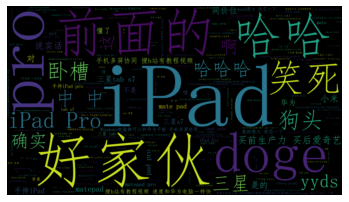

In [2]:
import jieba
import wordcloud
import matplotlib.pyplot as plt

danmus_ = " ".join(danmus_cleaned)

text = "".join(jieba.lcut(danmus_))

# 实例化词云，
wc = wordcloud.WordCloud(
    #选择字体路径，没有选择的话，中文无法正常显示
    font_path='C://Windows/Fonts/simfang.ttf',
    width=1920,
    height=1080,
    mode='RGBA')
# 文本中生成词云
wc.generate(text)
# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
 
# 保存到文件
wc.to_file('wordcloud.png')

In [3]:
from snownlp import SnowNLP
from tqdm import tqdm

scores = []
for danmu in tqdm(danmus_cleaned):
    if 'iPad' in danmu:
        continue
    if 'ipad' in danmu:
        continue
    if 'pro' in danmu:
        continue
    if '中中' in danmu:
        continue
    s = SnowNLP(danmu)
    scores.append(s.sentiments)

print(scores[:10])

100%|██████████| 23566/23566 [01:11<00:00, 329.22it/s]

[0.875, 0.5, 0.8712933967758189, 0.6558628208940429, 0.27314784977947515, 0.4049658551747607, 0.2147491716532779, 0.6695688322456746, 0.3233011284038174, 0.4729055116300136]


In [4]:
len(scores)

20930

In [5]:
distribute = [0,0,0,0,0,0,0,0,0,0]
for score in scores:
    distribute[int(score*10)] += 1

distribute

[2580, 1892, 1898, 1820, 2082, 2566, 1814, 1876, 1760, 2642]